# Automating Crypto Website API Pull

Developing this project based on this [video.](https://www.youtube.com/watch?v=KB2CtEDrglY)

I am going to work with Coinmarketcap API:

https://coinmarketcap.com/api/

In [88]:
#Import libraries
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd
import os
from time import time
from time import sleep
import seaborn as sns
import matplotlib.pyplot as plt

## API call

In [3]:
#Testing API is working -TAKEN FROM API Documentation

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15', #Modify as you like 
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '68a74ed6-1adb-4562-8af1-a74d736dddf8', ##changed to my personal key
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2025-02-03T10:44:04.169Z', 'error_code': 0, 'error_message': None, 'elapsed': 20, 'credit_count': 1, 'notice': None, 'total_count': 10805}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11888, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

Work around in case of having the error **IOPub data rate exceeded.**

Just go to Anaconda prompt and type the following:

`jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10`

In [4]:
data #check structure of the data -we can see is a JSON file

{'status': {'timestamp': '2025-02-03T10:44:04.169Z',
  'error_code': 0,
  'error_message': None,
  'elapsed': 20,
  'credit_count': 1,
  'notice': None,
  'total_count': 10805},
 'data': [{'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'slug': 'bitcoin',
   'num_market_pairs': 11888,
   'date_added': '2010-07-13T00:00:00.000Z',
   'tags': ['mineable',
    'pow',
    'sha-256',
    'store-of-value',
    'state-channel',
    'coinbase-ventures-portfolio',
    'three-arrows-capital-portfolio',
    'polychain-capital-portfolio',
    'binance-labs-portfolio',
    'blockchain-capital-portfolio',
    'boostvc-portfolio',
    'cms-holdings-portfolio',
    'dcg-portfolio',
    'dragonfly-capital-portfolio',
    'electric-capital-portfolio',
    'fabric-ventures-portfolio',
    'framework-ventures-portfolio',
    'galaxy-digital-portfolio',
    'huobi-capital-portfolio',
    'alameda-research-portfolio',
    'a16z-portfolio',
    '1confirmation-portfolio',
    'winklevoss-capital-portfoli

In [5]:
#Let's get the data in a more proper format
pd.set_option('display.max.columns', None) #display all the columns
df = pd.json_normalize(data['data'])
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,11888,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.981906e+07,1.981906e+07,False,NaN,1,NaN,NaN,None,2025-02-03T10:43:00.000Z,95365.680285,1.022484e+11,177.4792,-0.343669,-4.074260,-3.435431,-2.492262,-7.035682,38.817281,1.890058e+12,60.5398,2.002679e+12,None,2025-02-03T10:43:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,9910,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.205248e+08,1.205248e+08,True,NaN,2,NaN,NaN,None,2025-02-03T10:43:00.000Z,2600.248204,8.600073e+10,269.8732,0.329882,-16.095055,-14.647975,-27.448797,-33.888743,6.741827,3.133944e+11,10.0399,3.133944e+11,None,2025-02-03T10:43:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether USDt,USDT,tether,115409,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,1.393992e+11,1.425729e+11,True,NaN,3,NaN,NaN,None,2025-02-03T10:43:00.000Z,1.001468,2.679224e+11,202.7142,0.031185,0.167904,0.130204,0.187000,0.069631,0.189812,1.396039e+11,4.4724,1.427822e+11,None,2025-02-03T10:43:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,52,XRP,XRP,xrp,1521,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.770373e+10,9.998654e+10,False,NaN,4,NaN,NaN,None,2025-02-03T10:43:00.000Z,2.409847,3.442224e+10,443.2531,1.072362,-15.769801,-12.745074,-1.233897,1.117546,371.409368,1.390572e+11,4.4541,2.409847e+11,None,2025-02-03T10:43:00.000Z,NaN,NaN,NaN,NaN,NaN
4,5426,Solana,SOL,solana,835,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.869649e+08,5.932587e+08,True,NaN,5,NaN,NaN,None,2025-02-03T10:43:00.000Z,199.854792,1.445912e+10,195.8584,2.756249,-5.661688,-10.156287,-7.260294,-15.930938,23.821164,9.732227e+10,3.1173,1.185656e+11,None,2025-02-03T10:43:00.000Z,NaN,NaN,NaN,NaN,NaN
5,1839,BNB,BNB,bnb,2347,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.424805e+08,1.424805e+08,False,NaN,6,NaN,NaN,None,2025-02-03T10:43:00.000Z,580.786282,3.893068e+09,136.2733,1.016272,-11.425589,-10.205240,-18.650161,-20.813389,3.989645,8.275072e+10,2.6510,8.275072e+10,None,2025-02-03T10:43:00.000Z,NaN,NaN,NaN,NaN,NaN
6,3408,USDC,USDC,usd-coin,25383,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.382594e+10,5.382594e+10,False,NaN,7,NaN,NaN,None,2025-02-03T10:43:00.000Z,1.000057,2.178977e+10,189.4889,-0.015244,-0.000406,-0.055536,0.007836,0.018277,-0.003432,5.382902e+10,1.7242,5.382902e+10,None,2025-02-03T10:43:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
7,74,Dogecoin,DOGE,dogecoin,1159,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.478909e+11,1.478909e+11,True,NaN,8,NaN,NaN,None,2025-02-03T10:43:00.000Z,0.258456,1.089857e+10,357.6120,3.218107,-13.511838,-16.493507,-33.492629,-41.810265,54.048096,3.822337e+10,1.2245,3.822337e+10,None,2025-02-03T10:43:00.000Z,NaN,NaN,NaN,NaN,NaN
8,2010,Cardano,ADA,cardano,1455,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.518584e+10,4.499520e+10,False,NaN,9,NaN,NaN,None,2025-02-03T10:43:00.000Z,0.710094,3.993845e+09,467.0979,2.627748,-19.793087,-18.921757,-33.090144,-41.672106,114.608345,2.498527e+10,0.8003,3.195424e+10,N

In [6]:
df.shape #Matriz size

(15, 36)

In [7]:
#IMPORTANT: First thing to be done is gonna be add a TIMESTAMP, which allows to identify when the data is retrieved
df['timestamp'] = pd.Timestamp('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11888,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.981906e+07,1.981906e+07,False,NaN,1,NaN,NaN,None,2025-02-03T10:43:00.000Z,95365.680285,1.022484e+11,177.4792,-0.343669,-4.074260,-3.435431,-2.492262,-7.035682,38.817281,1.890058e+12,60.5398,2.002679e+12,None,2025-02-03T10:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-03 11:44:22.805892
1,1027,Ethereum,ETH,ethereum,9910,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.205248e+08,1.205248e+08,True,NaN,2,NaN,NaN,None,2025-02-03T10:43:00.000Z,2600.248204,8.600073e+10,269.8732,0.329882,-16.095055,-14.647975,-27.448797,-33.888743,6.741827,3.133944e+11,10.0399,3.133944e+11,None,2025-02-03T10:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-03 11:44:22.805892
2,825,Tether USDt,USDT,tether,115409,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,1.393992e+11,1.425729e+11,True,NaN,3,NaN,NaN,None,2025-02-03T10:43:00.000Z,1.001468,2.679224e+11,202.7142,0.031185,0.167904,0.130204,0.187000,0.069631,0.189812,1.396039e+11,4.4724,1.427822e+11,None,2025-02-03T10:43:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-02-03 11:44:22.805892
3,52,XRP,XRP,xrp,1521,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.770373e+10,9.998654e+10,False,NaN,4,NaN,NaN,None,2025-02-03T10:43:00.000Z,2.409847,3.442224e+10,443.2531,1.072362,-15.769801,-12.745074,-1.233897,1.117546,371.409368,1.390572e+11,4.4541,2.409847e+11,None,2025-02-03T10:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-03 11:44:22.805892
4,5426,Solana,SOL,solana,835,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.869649e+08,5.932587e+08,True,NaN,5,NaN,NaN,None,2025-02-03T10:43:00.000Z,199.854792,1.445912e+10,195.8584,2.756249,-5.661688,-10.156287,-7.260294,-15.930938,23.821164,9.732227e+10,3.1173,1.185656e+11,None,2025-02-03T10:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-03 11:44:22.805892
5,1839,BNB,BNB,bnb,2347,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.424805e+08,1.424805e+08,False,NaN,6,NaN,NaN,None,2025-02-03T10:43:00.000Z,580.786282,3.893068e+09,136.2733,1.016272,-11.425589,-10.205240,-18.650161,-20.813389,3.989645,8.275072e+10,2.6510,8.275072e+10,None,2025-02-03T10:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-03 11:44:22.805892
6,3408,USDC,USDC,usd-coin,25383,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.382594e+10,5.382594e+10,False,NaN,7,NaN,NaN,None,2025-02-03T10:43:00.000Z,1.000057,2.178977e+10,189.4889,-0.015244,-0.000406,-0.055536,0.007836,0.018277,-0.003432,5.382902e+10,1.7242,5.382902e+10,None,2025-02-03T10:43:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-02-03 11:44:22.805892
7,74,Dogecoin,DOGE,dogecoin,1159,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.478909e+11,1.478909e+11,True,NaN,8,NaN,NaN,None,2025-02-03T10:43:00.000Z,0.258456,1.089857e+10,357.6120,3.218107,-13.511838,-16.493507,-33.492629,-41.810265,54.048096,3.822337e+10,1.2245,3.822337e+10,None,2025-02-03T10:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-03 11:44:22.805892
8,2010,Cardano,ADA,cardano,1455,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contr

In [8]:
#Now: We are going to create an automated script to execute the API pull
#1. We define the function

def api_runner():
    global df #we set as a global variable
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15', #Modify as you like 
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '68a74ed6-1adb-4562-8af1-a74d736dddf8', ##my personal key
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print('Success retrieval')
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    #We define df2 to append the new information retrieved into df defined before
    
    # Process data
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.Timestamp.now()
    df
        
    #Save into csv file
    if not os.path.isfile(r'C:\Users\Leo\Desktop\Python Projects\ETL-ELT-examples\Automating-Crypto-Website-API-Pull\API.csv'): #check if not exist
        df.to_csv(r'C:\Users\Leo\Desktop\Python Projects\ETL-ELT-examples\Automating-Crypto-Website-API-Pull\API.csv', header ='column_names')
    else:
        df.to_csv(r'C:\Users\Leo\Desktop\Python Projects\ETL-ELT-examples\Automating-Crypto-Website-API-Pull\API.csv', mode ='a', header=False) #mode stands for append

In [9]:
#2. We automate the script to be executed on time ranges

for i in range(3): #I am setting 333 because that is the max calls Coinmarketcap allows me to make per day
    api_runner()
    print('API runner completed!')
    sleep(60) #sleep for 1 minuto
exit()

#This loop is executing itself 333 times. It runs api_runner, then print 'API runner completed!' and waits 60 seconds to execute the next

Success retrieval
API runner completed!
Success retrieval
API runner completed!
Success retrieval
API runner completed!


In [3]:
#Just checking the function made what actually is expected to do
df_csv = pd.read_csv(r'C:\Users\Leo\Desktop\Python Projects\ETL-ELT-examples\Automating-Crypto-Website-API-Pull\API.csv')
df_csv

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11884,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.981710e+07,...,58.4828,2.209921e+12,NaN,2025-01-30T09:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-30 10:26:47.335203
1,1,1027,Ethereum,ETH,ethereum,9902,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.205163e+08,...,10.8524,3.869304e+11,NaN,2025-01-30T09:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-30 10:26:47.335203
2,2,52,XRP,XRP,xrp,1519,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.764121e+10,...,5.0229,3.106935e+11,NaN,2025-01-30T09:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-30 10:26:47.335203
3,3,825,Tether USDt,USDT,tether,115087,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'eth...",NaN,1.394058e+11,...,3.9099,1.425698e+11,NaN,2025-01-30T09:25:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-01-30 10:26:47.335203
4,4,5426,Solana,SOL,solana,834,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.867429e+08,...,3.2890,1.428604e+11,NaN,2025-01-30T09:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-30 10:26:47.335203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,10,1975,Chainlink,LINK,chainlink,1923,2017-09-20T00:00:00.000Z,"['platform', 'defi', 'oracles', 'smart-contrac...",NaN,6.381000e+08,...,0.3896,1.906384e+10,NaN,2025-02-03T10:46:00.000Z,1027.0,Ethereum,ETH,ethereum,0x514910771af9ca656af840dff83e8264ecf986ca,2025-02-03 11:46:47.248284
86,11,5805,Avalanche,AVAX,avalanche,855,2020-07-13T00:00:00.000Z,"['defi', 'smart-contracts', 'three-arrows-capi...",7.157487e+08,4.117057e+08,...,0.3347,1.816076e+10,NaN,2025-02-03T10:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-03 11:46:47.248284
87,12,512,Stellar,XLM,stellar,667,2014-08-05T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",5.000181e+10,3.057599e+10,...,0.3340,1.705805e+10,NaN,2025-02-03T10:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-03 11:46:47.248284
88,13,11419,Toncoin,TON,toncoin,669,2021-08-26T13:40:22.000Z,"['pos', 'ethereum-ecosystem', 'bnb-chain-ecosy...",NaN,2.489877e+09,...,0.3138,2.015000e+10,NaN,2025-02-03T10:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-03 11:46:47.248284


## Data Cleaning

In [13]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) #for not showing e+xx notation
pd.set_option('display.max.rows', None) #display all the rows

In [14]:
df_csv

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11884,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.000,19817103.000,19817103.000,False,NaN,1,NaN,NaN,NaN,2025-01-30T09:24:00.000Z,105234.343,52660656818.757,23.450,0.070,2.718,2.865,12.042,8.571,51.727,2085439814835.966,58.483,2209921203495.550,NaN,2025-01-30T09:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-30 10:26:47.335203
1,1,1027,Ethereum,ETH,ethereum,9902,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120516309.233,120516309.233,True,NaN,2,NaN,NaN,NaN,2025-01-30T09:25:00.000Z,3210.606,24685029145.665,23.558,0.536,2.509,-0.080,-5.187,-13.181,28.367,386930365163.349,10.852,386930365163.350,NaN,2025-01-30T09:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-30 10:26:47.335203
2,2,52,XRP,XRP,xrp,1519,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.000,57641211234.000,99986586496.000,False,NaN,3,NaN,NaN,NaN,2025-01-30T09:25:00.000Z,3.107,6894874179.769,-15.760,-0.070,0.715,-0.149,49.881,60.989,496.409,179087488585.698,5.023,310693486052.320,NaN,2025-01-30T09:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-30 10:26:47.335203
3,3,825,Tether USDt,USDT,tether,115087,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'eth...",NaN,139405758247.312,142572893912.028,True,NaN,4,NaN,NaN,NaN,2025-01-30T09:25:00.000Z,1.000,100794903640.323,17.206,-0.011,0.033,0.053,0.163,-0.056,0.091,139402750158.868,3.910,142569817483.340,NaN,2025-01-30T09:25:00.000Z,1027.000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-01-30 10:26:47.335203
4,4,5426,Solana,SOL,solana,834,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,486742946.245,593004890.684,True,NaN,5,NaN,NaN,NaN,2025-01-30T09:25:00.000Z,240.909,6346582935.643,42.084,0.619,3.541,-2.890,25.000,1.521,45.126,117260898985.562,3.289,142860388878.430,NaN,2025-01-30T09:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-30 10:26:47.335203
5,5,1839,BNB,BNB,bnb,2345,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,142480756.830,142480756.830,False,NaN,6,NaN,NaN,NaN,2025-01-30T09:25:00.000Z,678.479,1635651403.810,-7.602,0.184,1.182,-1.257,-3.446,3.393,17.614,96670179832.423,2.712,96670179832.420,NaN,2025-01-30T09:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-30 10:26:47.335203
6,6,3408,USDC,USDC,usd-coin,25277,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,52665172618.918,52665172618.918,False,NaN,7,NaN,NaN,NaN,2025-01-30T09:25:00.000Z,1.000,9937337384.576,23.537,-0.010,0.002,0.001,-0.000,-0.006,-0.004,52663377218.849,1.477,52663377218.850,NaN,2025-01-30T09:25:00.000Z,1027.000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-01-30 10:26:47.335203
7,7,74,Dogecoin,DOGE,dogecoin,1158,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,147835636383.705,147835636383.705,True,NaN,8,NaN,NaN,NaN,2025-01-30T09:25:00.000Z,0.332,1929859789.459,1.552,0.432,1.288,-5.671,4.531,-22.277,109.471,49085651983.078,1.377,49085651983.080,NaN,2025-01-30T09:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-30 10:26:47.335203
8,8,2010,Cardano,ADA,cardano,1453,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.000,35185844017.058,44995198033.250,False,NaN,9,NaN,NaN

In [93]:
#Now we are gonna group the df by name of the crypto
df_grouped = df_csv.groupby('name', sort=False)['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'].mean()
df_grouped

<ipython-input-93-9023e0bdf970>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_grouped = df_csv.groupby('name', sort=False)['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'].mean()


,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.179,-0.651,-0.260,4.794,0.769,45.271
Ethereum,0.391,-6.869,-7.467,-16.373,-23.575,17.436
XRP,0.372,-7.628,-6.521,24.232,31.047,433.614
Tether USDt,-0.007,0.088,0.096,0.158,-0.004,0.130
Solana,1.676,-1.073,-6.507,8.877,-7.256,34.468
BNB,0.574,-5.155,-5.740,-11.088,-8.726,10.742
USDC,-0.014,0.003,-0.007,0.009,0.011,0.006
Dogecoin,1.784,-6.149,-11.090,-14.481,-32.054,81.666
Cardano,1.462,-8.105,-9.526,-10.504,-25.885,146.337


In [94]:
df_stacked = df_grouped.stack()
df_stacked

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.179
             quote.USD.percent_change_24h    -0.651
             quote.USD.percent_change_7d     -0.260
             quote.USD.percent_change_30d     4.794
             quote.USD.percent_change_60d     0.769
             quote.USD.percent_change_90d    45.271
Ethereum     quote.USD.percent_change_1h      0.391
             quote.USD.percent_change_24h    -6.869
             quote.USD.percent_change_7d     -7.467
             quote.USD.percent_change_30d   -16.373
             quote.USD.percent_change_60d   -23.575
             quote.USD.percent_change_90d    17.436
XRP          quote.USD.percent_change_1h      0.372
             quote.USD.percent_change_24h    -7.628
             quote.USD.percent_change_7d     -6.521
             quote.USD.percent_change_30d    24.232
             quote.USD.percent_change_60d    31.047
             quote.USD.percent_change_90d   433.614
Tether USDt  quote.USD

In [95]:
df_stacked2 = df_stacked.to_frame(name='Values') #we transforme to data frame
df_stacked2

Values
name                                            
Bitcoin     quote.USD.percent_change_1h   -0.179
            quote.USD.percent_change_24h  -0.651
            quote.USD.percent_change_7d   -0.260
            quote.USD.percent_change_30d   4.794
            quote.USD.percent_change_60d   0.769
            quote.USD.percent_change_90d  45.271
Ethereum    quote.USD.percent_change_1h    0.391
            quote.USD.percent_change_24h  -6.869
            quote.USD.percent_change_7d   -7.467
            quote.USD.percent_change_30d -16.373
            quote.USD.percent_change_60d -23.575
            quote.USD.percent_change_90d  17.436
XRP         quote.USD.percent_change_1h    0.372
            quote.USD.percent_change_24h  -7.628
            quote.USD.percent_change_7d   -6.521
            quote.USD.percent_change_30d  24.232
            quote.USD.percent_change_60d  31.047
            quote.USD.percent_change_90d 433.614
Tether USDt quote.USD.percent_change_1h   -0.007
            quote.USD.percent_change_24h   0.088
            quote.USD.percent_change_7d    0.096
            quote.USD.percent_change_30d   0.158
            quote.USD.percent_change_60d  -0.004
            quote.USD.percent_change_90d   0.130
Solana      quote.USD.percent_change_1h    1.676
            quote.USD.percent_change_24h  -1.073
            quote.USD.percent_change_7d   -6.507
            quote.USD.percent_change_30d   8.877
            quote.USD.percent_change_60d  -7.256
            quote.USD.percent_change_90d  34.468
BNB         quote.USD.percent_change_1h    0.574
            quote.USD.percent_change_24h  -5.155
            quote.USD.percent_change_7d   -5.740
            quote.USD.percent_change_30d -11.088
            quote.USD.percent_change_60d  -8.726
            quote.USD.percent_change_90d  10.742
USDC        quote.USD.percent_change_1h   -0.014
            quote.USD.percent_change_24h   0.003
            quote.USD.percent_change_7d   -0.007
            quote.USD.percent_change_30d   0.009
            quote.USD.percent_change_60d   0.011
            quote.USD.percent_change_90d   0.006
Dogecoin    quote.USD.percent_change_1h    1.784
            quote.USD.percent_change_24h  -6.149
            quote.USD.percent_change_7d  -11.090
            quote.USD.percent_change_30d -14.481
            quote.USD.percent_change_60d -32.054
            quote.USD.percent_change_90d  81.666
Cardano     quote.USD.percent_change_1h    1.462
            quote.USD.percent_change_24h  -8.105
            quote.USD.percent_change_7d   -9.526
            quote.USD.percent_change_30d -10.504
            quote.USD.percent_change_60d -25.885
            quote.USD.percent_change_90d 146.337
TRON        quote.USD.percent_change_1h    0.706
            quote.USD.percent_change_24h  -2.850
            quote.USD.percent_change_7d   -3.056
            quote.USD.percent_change_30d  -9.732
            quote.USD.percent_change_60d  -7.185
            quote.USD.percent_change_90d  42.767
Chainlink   quote.USD.percent_change_1h    1.205
            quote.USD.percent_change_24h  -4.788
            quote.USD.percent_change_7d   -6.876
            quote.USD.percent_change_30d   0.658
            quote.USD.percent_change_60d   5.789
            quote.USD.percent_change_90d  98.878
Avalanche   quote.USD.percent_change_1h    1.278
            quote.USD.percent_change_24h  -8.318
            quote.USD.percent_change_7d  -13.822
            quote.USD.percent_change_30d -22.543
            quote.USD.percent_change_60d -37.499
            quote.USD.percent_change_90d  22.808
Sui         quote.USD.percent_change_1h    2.105
            quote.USD.percent_change_24h  -1.286
            quote.USD.percent_change_7d   -8.078
            quote.USD.percent_change_30d -20.781
            quote.USD.percent_change_60d   2.100
            quote.USD.percent_change_90d  89.856
Stellar     quote.USD.percent_change_1h    1.246
            quote.USD.percent_change_24h  -5.127
            quote.USD.pe

In [96]:
#Set the name as index and reset the index
df = df_stacked2.reset_index()
df

,name,level_1,Values
0,Bitcoin,quote.USD.percent_change_1h,-0.179
1,Bitcoin,quote.USD.percent_change_24h,-0.651
2,Bitcoin,quote.USD.percent_change_7d,-0.260
3,Bitcoin,quote.USD.percent_change_30d,4.794
4,Bitcoin,quote.USD.percent_change_60d,0.769
5,Bitcoin,quote.USD.percent_change_90d,45.271
6,Ethereum,quote.USD.percent_change_1h,0.391
7,Ethereum,quote.USD.percent_change_24h,-6.869
8,Ethereum,quote.USD.percent_change_7d,-7.467
9,Ethereum,quote.USD.percent_change_30d,-16.373


In [97]:
#Rename columns
df_2 = df.rename(columns={'name': 'crypto_currency', 'level_1':'percent_change'})
df_2

,crypto_currency,percent_change,Values
0,Bitcoin,quote.USD.percent_change_1h,-0.179
1,Bitcoin,quote.USD.percent_change_24h,-0.651
2,Bitcoin,quote.USD.percent_change_7d,-0.260
3,Bitcoin,quote.USD.percent_change_30d,4.794
4,Bitcoin,quote.USD.percent_change_60d,0.769
5,Bitcoin,quote.USD.percent_change_90d,45.271
6,Ethereum,quote.USD.percent_change_1h,0.391
7,Ethereum,quote.USD.percent_change_24h,-6.869
8,Ethereum,quote.USD.percent_change_7d,-7.467
9,Ethereum,quote.USD.percent_change_30d,-16.373


In [104]:
#I will change values of the categories, equivalent to CASE WHEN
df_2['percent_change'] = df_2['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], ['1h', '24h', '7d', '30d', '60d', '90d'])
df_2

,crypto_currency,percent_change,Values
0,Bitcoin,1h,-0.179
1,Bitcoin,24h,-0.651
2,Bitcoin,7d,-0.260
3,Bitcoin,30d,4.794
4,Bitcoin,60d,0.769
5,Bitcoin,90d,45.271
6,Ethereum,1h,0.391
7,Ethereum,24h,-6.869
8,Ethereum,7d,-7.467
9,Ethereum,30d,-16.373


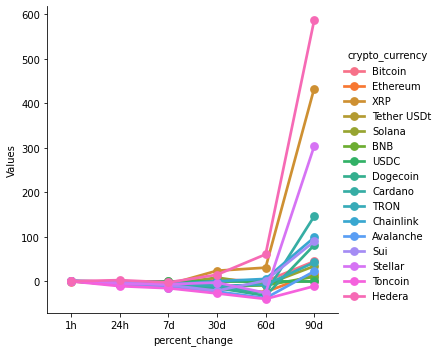

In [106]:
#Visualize trend
sns.catplot(x='percent_change', y='Values', hue='crypto_currency', data=df_2, kind = 'point')

In [113]:
#Now lets watch crypto price over the timestamp
df_3 = df_csv[['name', 'quote.USD.price', 'timestamp']]
df_3

,name,quote.USD.price,timestamp
0,Bitcoin,105234.343,2025-01-30 10:26:47.335203
1,Ethereum,3210.606,2025-01-30 10:26:47.335203
2,XRP,3.107,2025-01-30 10:26:47.335203
3,Tether USDt,1.000,2025-01-30 10:26:47.335203
4,Solana,240.909,2025-01-30 10:26:47.335203
5,BNB,678.479,2025-01-30 10:26:47.335203
6,USDC,1.000,2025-01-30 10:26:47.335203
7,Dogecoin,0.332,2025-01-30 10:26:47.335203
8,Cardano,0.962,2025-01-30 10:26:47.335203
9,TRON,0.247,2025-01-30 10:26:47.335203


In [120]:
#select only Bitcoin
df_4 = df_3[df_3['name'] == 'Bitcoin']

#Reset index
df_4 = df_4.reset_index()

In [130]:
#Select rows/colums by position
df_5= df_4.iloc[:,1:4]
df_5

,name,quote.USD.price,timestamp
0,Bitcoin,105234.343,2025-01-30 10:26:47.335203
1,Bitcoin,105210.312,2025-01-30 10:27:48.514679
2,Bitcoin,105216.319,2025-01-30 10:28:48.853283
3,Bitcoin,95365.680,2025-02-03 11:44:46.158321
4,Bitcoin,95425.599,2025-02-03 11:45:46.882013
5,Bitcoin,95425.599,2025-02-03 11:46:47.248284


<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

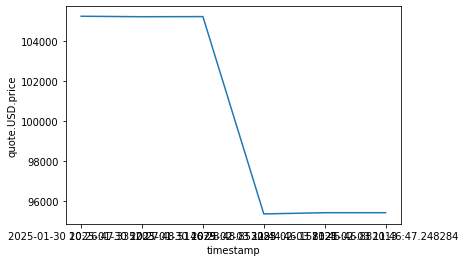

In [131]:
#Lineplot to looks distribution of bitcoint price over timestamp
sns.lineplot(x='timestamp', y='quote.USD.price', data=df_5)